In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('abalone_data.csv')

In [3]:
df.head()

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
lenght            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()
#Work accident, left, promotion last 5 years are booleans

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


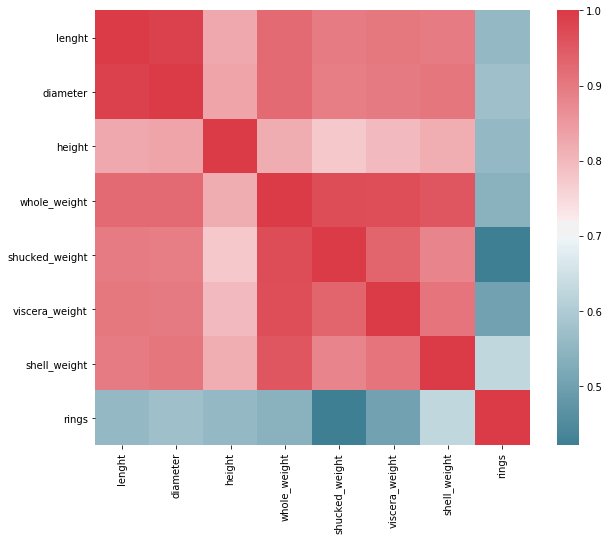

In [6]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [7]:
df.corr()

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
lenght,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [8]:
df['sex'].value_counts()/len(df)
#sex percentages

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

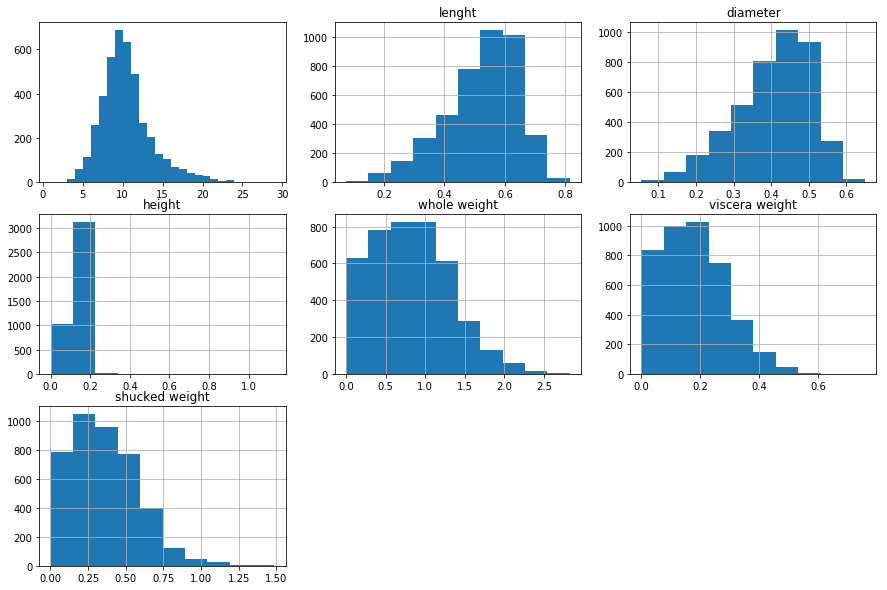

In [12]:
fig = plt.figure(figsize = (15, 10))
fig_dims = (3, 3)

plt.subplot2grid(fig_dims, (0, 0))
plt.hist(df['rings'], bins=len(df['rings'].unique()))

plt.subplot2grid(fig_dims, (0, 1))
df['lenght'].hist()
plt.title('lenght')

plt.subplot2grid(fig_dims, (0, 2))
df['diameter'].hist()
plt.title('diameter')

plt.subplot2grid(fig_dims, (1, 0))
df['height'].hist()
plt.title('height')

plt.subplot2grid(fig_dims, (1, 1))
df['whole_weight'].hist()
plt.title('whole weight')

plt.subplot2grid(fig_dims, (1, 2))
df['viscera_weight'].hist()
plt.title('viscera weight')

plt.subplot2grid(fig_dims, (2, 0))
df['shucked_weight'].hist()
plt.title('shucked weight')

plt.show()

#maybe pie charts in some case are better (time spend company or n.proj)

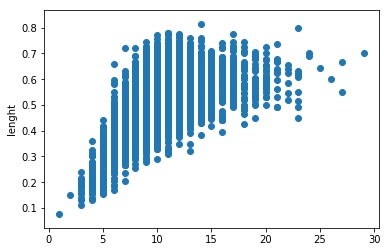

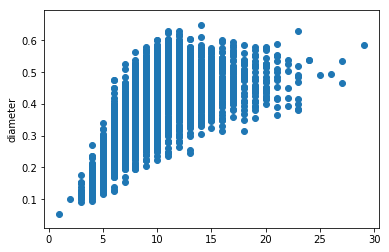

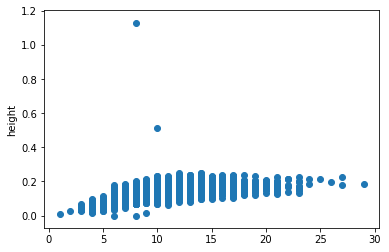

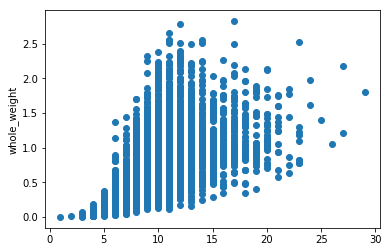

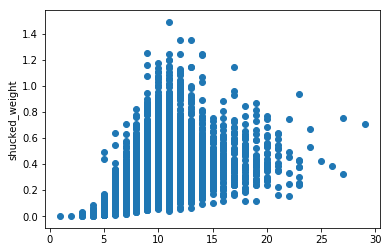

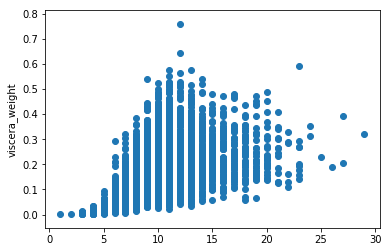

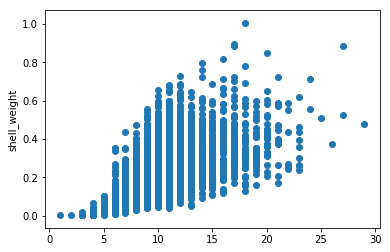

In [17]:
for attr in df.columns:
    if attr != 'rings' and attr != 'sex':
        plt.scatter(df['rings'], df[attr])
        plt.ylabel(attr)
        plt.show()